<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/CupIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import copy
import os
from tqdm import tnrange, tqdm_notebook as tqdm

In [66]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [68]:
!pip3 install kaggle

In [0]:
user = 'qiaohe'
key = '6992d820d95bfc00100fdab824b8ccbb'
 
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c changellenge-cupit-2019-posneg

  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 41.4MB/s]
100% 4.23M/4.23M [00:00<00:00, 38.4MB/s]

  0% 0.00/51.3k [00:00<?, ?B/s]
100% 51.3k/51.3k [00:00<00:00, 52.3MB/s]


In [14]:
!unzip train_data.csv.zip -d train 

Archive:  train_data.csv.zip
  inflating: train/train_data.csv    


In [15]:
!unzip test_data.csv.zip -d test 

Archive:  test_data.csv.zip
  inflating: test/test_data.csv      


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train/train_data.csv', encoding='utf', engine='python', index_col=0)
test = pd.read_csv('test/test_data.csv', encoding='utf', engine='python', index_col=0)

In [71]:
train.head(10)

,title,text,score
0,Просьба об отмене штрафа КАСКО,Здравствуйте! 10.06.2016г. мною был заключен д...,Позитивный
1,"В целом хорошо, работали по ипотеке.","Брала ипотеку в юникоре, порадовали квалифика...",Негативный
2,Нас всегда выручает банк Уралсиб!,Знакомство с банком началось с ипотеки в 2009 ...,Позитивный
3,Абсолютно неприемлемая ситуация и ее решение,Клиент Совкомбанка с 2017 года. В феврале 2018...,Позитивный
4,Внёс не туда,Пришёл оплачивать кредит и ошибочно внёс деньг...,Позитивный
5,Спасибо руководству банка за положительное реш...,Банк «Металлинвестбанк» ошибочно ввел меня в з...,Позитивный
6,Была приятно удивлена,Получила промо-код для открытия вклада. Из за ...,Позитивный
7,"Россельхозбанк: ""И пусть весь мир подождёт!""",Что можно сделать за 45 минут?Можно провести и...,Негативный
8,"Не хотелось бы разочаровываться в этом банке, ...",Банк сам предложил мне карту как лучшему клиен...,Негативный
9,Разбавлю позитивом. Кредитка АБ меня здорово в...,"подперло на работе (сдача проекта, как всегда,...",Позитивный


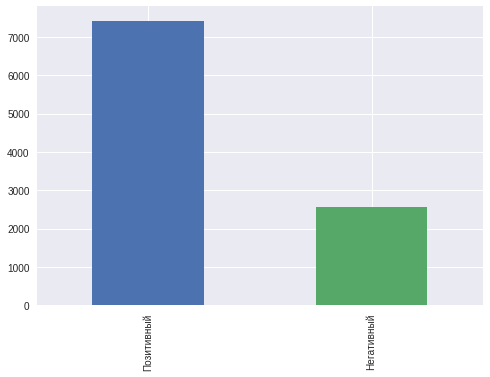

In [72]:
train.score.value_counts().plot.bar()

In [0]:
tf_idf = TfidfVectorizer(ngram_range=(1, 4), stop_words=stopwords.words('russian'), 
                         #tokenizer=None,
                         #preprocessor=None,
                         analyzer='word',
                         max_df=0.8, 
                         min_df=10,
                         #max_features=10000
                        )

In [74]:
%%time
tf_idf_model = tf_idf.fit(np.concatenate([train['text'], test['text']]))

CPU times: user 21.2 s, sys: 471 ms, total: 21.7 s
Wall time: 21.7 s


In [75]:
%%time
train_tf_idf_vec = tf_idf_model.transform(train['text'])
test_tf_idf_vec = tf_idf_model.transform(test['text'])

CPU times: user 4.53 s, sys: 4.34 ms, total: 4.54 s
Wall time: 4.54 s


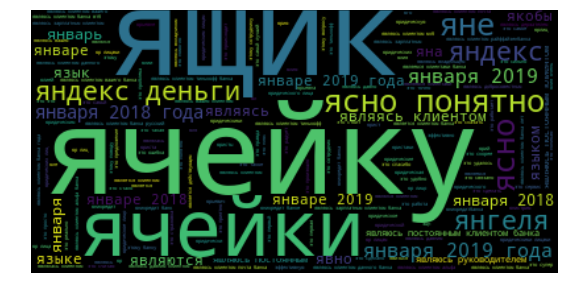

In [76]:
wordcloud = WordCloud().generate_from_frequencies(tf_idf_model.vocabulary_)

# Display the generated image:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.tight_layout()
plt.show() 

In [0]:
lm = LogisticRegression(#solver='newton-cg', 
                        #n_jobs=-1,
                        #solver='lbfgs',
                        penalty='l2',
                        #tol=0.000000001,
                        random_state=42,
                        C=10, 
                        max_iter=100000)

In [0]:
lm_params = {'penalty':['l2'],
             'C':[2],
             'solver':['sag'],
             'tol' : [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0001]
    
    
}
lm_search = GridSearchCV(estimator=lm, 
                         param_grid=lm_params, 
                         scoring ='roc_auc', 
                         cv=StratifiedKFold(10), 
                         n_jobs=-1,
                         verbose=1)

In [93]:
%%time
lm_search_fitted = lm_search.fit(X=train_tf_idf_vec, y=pd.factorize(train.score)[0])

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    8.9s finished


CPU times: user 487 ms, sys: 19.8 ms, total: 507 ms
Wall time: 9.29 s


In [94]:
lm_search_fitted.best_estimator_

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
pred_scores = cross_val_score(estimator=lm_search_fitted.best_estimator_, X=train_tf_idf_vec, y=pd.factorize(train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.9233667056392523

In [0]:
predicts = lm_search_fitted.best_estimator_.predict_proba(test_tf_idf_vec)[:, 0]

In [0]:
sub = pd.DataFrame({'index': range(0, len(predicts)),
                    'score':predicts})
sub.to_csv('submission1.csv', index=False)

In [103]:
pd.read_csv('submission1.csv').head()

,index,score
0,0,0.982678
1,1,0.926598
2,2,0.752378
3,3,0.949723
4,4,0.795021


In [99]:
pd.read_csv('sample_submission.csv').head()

,index,score
0,0,0.034124
1,1,0.165503
2,2,0.446687
3,3,0.587275
4,4,0.422388
